# INSIGHTS - DATA SCIENCE DIEGO LAGORIO


### Alumno: Diego Lagorio

## Introducción y Descripción del Problema

En crucial para toda empresa conocer sus clientes y cómo estos se comportan para poder entender sus necesidades y comportamiento, asi  ofrecer un buen producto o servicio y sacar maximo provecho.

En el caso de las instituciones financieras la actividad principal es la de realizar prestamos. Contar con una herramienta que permita conocer la probabilidad de morosidad de los prestamos ofrecidos podría ayudar a tomar decisiones más informadas sobre la aprobación de los mismos y la gestión del riesgo asociado.


## Objetivo

Desarrollar un modelo de aprendisaje supervisado para predecir si un cliente va a entrar en morosidad en un prestamo.


## Fuente

https://www.kaggle.com/datasets/yasserh/loan-default-dataset

## Importación de Librerías y Carga de Datos


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
loan = pd.read_csv('Loan_Default.csv')

## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [3]:

loan.info()
loan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


El conjunto de datos esta compuesto por 148.670 filas y 34 columnas. 



**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir el incumplimiento de un préstamo incluyen "loan_limit," "loan_type," "loan_purpose," "Credit_Worthiness," "loan_amount," "rate_of_interest," "Income," "Credit_Score," "LTV," y "dtir1."

## Variables Interesantes

Las variables consideradas interesantes son:
    loan_amount, 
    Credit_Score,
    LTV,
    age,
    gender,
    credit_type,
    income,
    Credit_Worthiness,
    term.

In [6]:
loan.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


## HIPOTESIS PLANTEADAS

#### 1. Las chances de ser moroso en un prestamo esta influido por el ingreso de las personas y su género.

#### 2. La morosidad es mas alta en personas mayores y en personas menores

#### 3. Los prestamos de tipo 2 y tipo 3 son mas propensos a generar morosidad

### Análisis de variables

#### 1. El ingreso medio de una persona con genero femenino es el más bajo. 

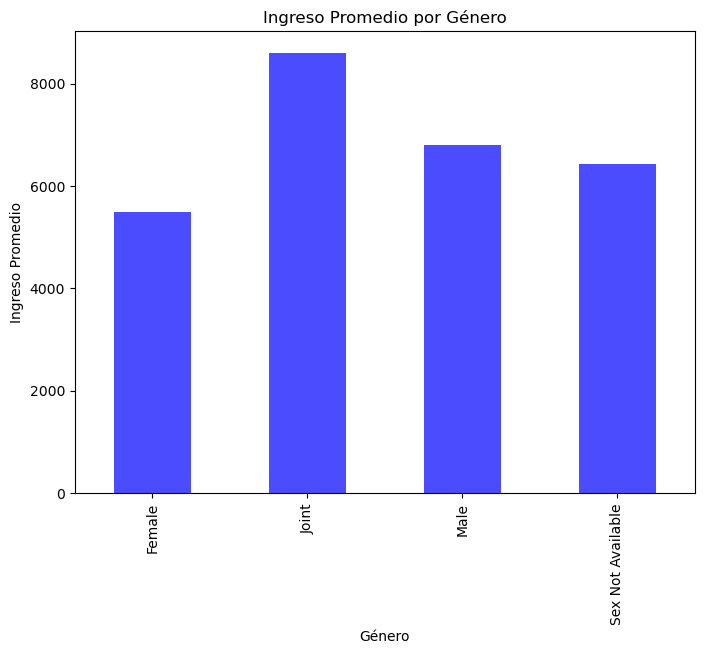

In [12]:
ingreso_genero= loan.groupby('Gender')['income'].mean()

plt.figure(figsize=(8, 6)) 

ingreso_genero.plot(kind='bar', color=['blue'], alpha=0.7)

plt.xlabel('Género')
plt.ylabel('Ingreso Promedio')
plt.title('Ingreso Promedio por Género')

plt.show()

#### 2. La mayoria de los prestamos son del tipo 1

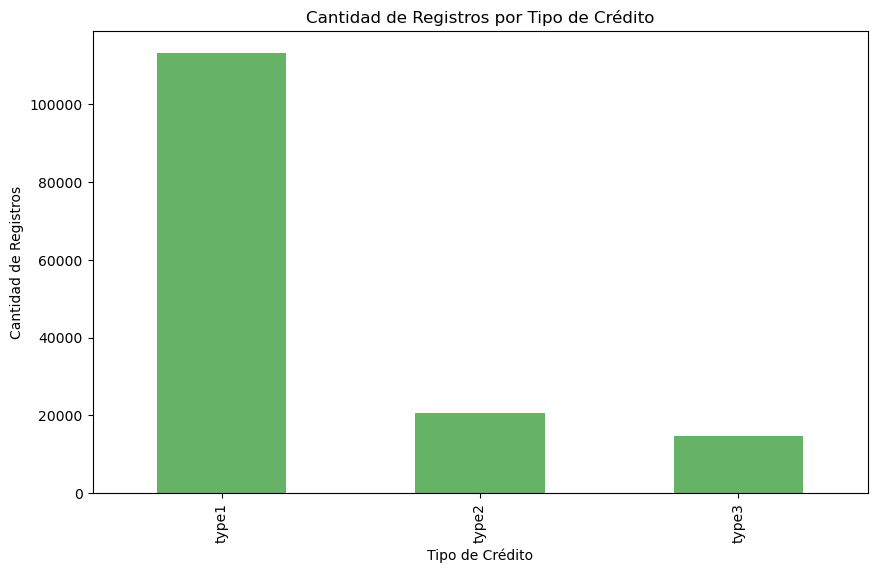

In [14]:
tipo_prestamo = loan['loan_type'].value_counts()


plt.figure(figsize=(10, 6)) 


tipo_prestamo.plot(kind='bar', color='green', alpha=0.6)

plt.xlabel('Tipo de Crédito')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Tipo de Crédito')

plt.show()

#### 3. Existen varios valores atipicos en el monto del prestamo y existe una leve asimetria hacia la izquierda ya que la media se ubica hacia ese sentido.

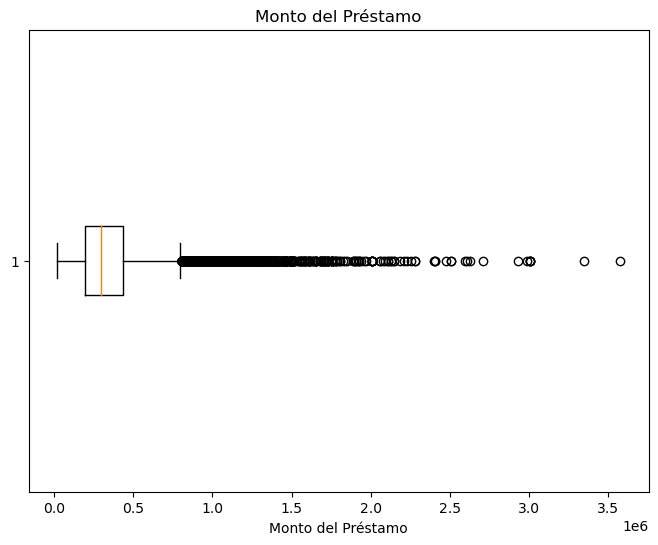

In [15]:
plt.figure(figsize=(8, 6))  

plt.boxplot(loan['loan_amount'], vert=False) 

plt.xlabel('Monto del Préstamo')
plt.title('Monto del Préstamo')


plt.show()

#### 4. El monto medio de prestamo es de USD 331.117

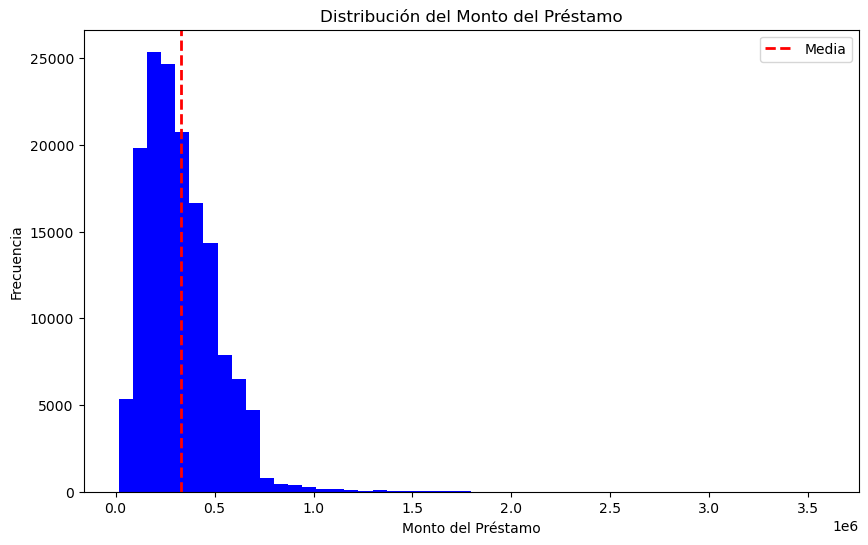

331117.7439967714

In [16]:

plt.figure(figsize=(10, 6))

plt.hist(loan['loan_amount'], bins=50, color='blue')

plt.xlabel('Monto del Préstamo')
plt.ylabel('Frecuencia')
plt.title('Distribución del Monto del Préstamo')

plt.axvline(loan['loan_amount'].mean(), color='red', linestyle='dashed', linewidth=2, label='Media')
plt.legend()
plt.show()

loan['loan_amount'].mean()

#### 5. vemos que no existe una relacion entre el ingreso y el puntaje.

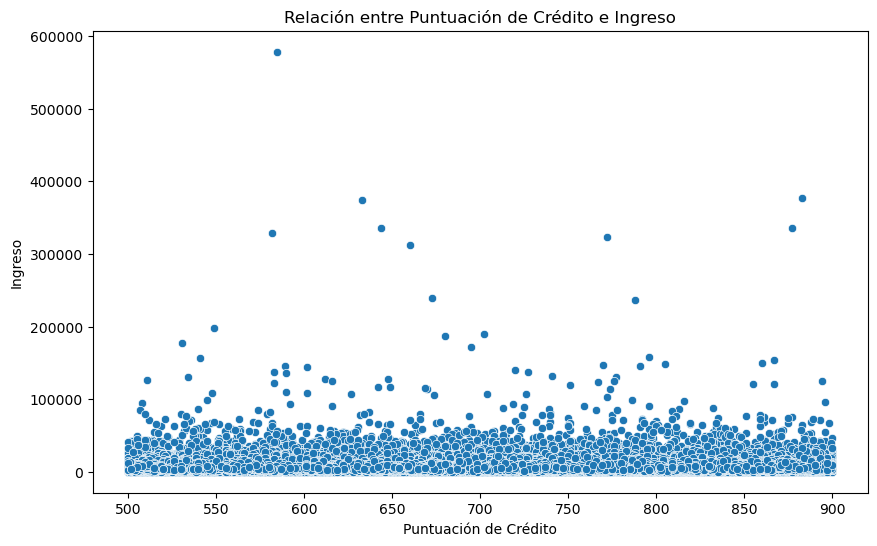

In [20]:
plt.figure(figsize=(10, 6))  

sns.scatterplot(x="Credit_Score", y="income", data=loan)

plt.xlabel("Puntuación de Crédito")
plt.ylabel("Ingreso")
plt.title("Relación entre Puntuación de Crédito e Ingreso")


plt.show()

#### 6. considerando que status 0 estaría en regla y status 1 estaría fuera de regla, podemos ver que las personas mayores y las personas menores son más propensas a estar fuera de regla en el prestamo.  

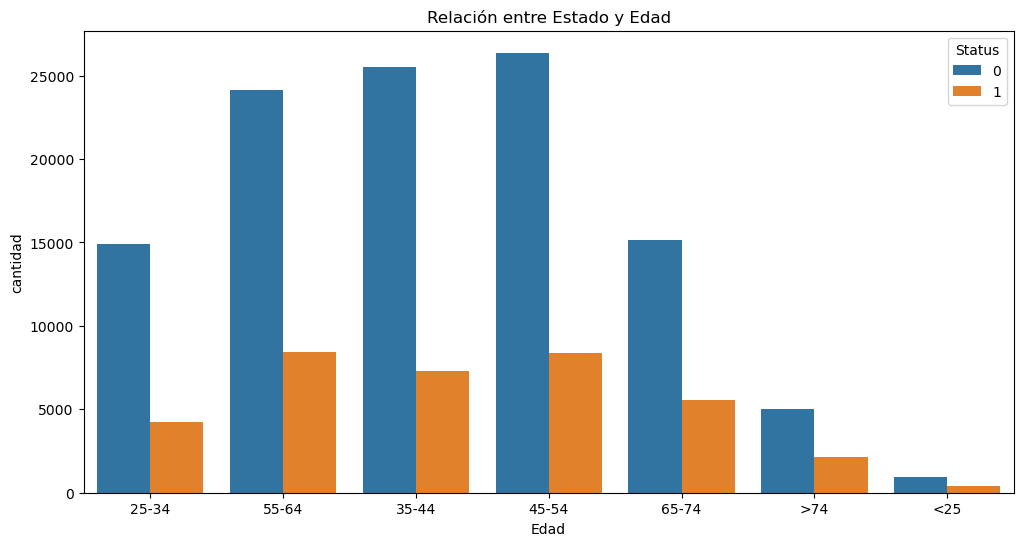

In [21]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x="age", hue="Status", data=loan)

plt.xlabel("Edad")
plt.ylabel("cantidad")
plt.title("Relación entre Estado y Edad")

plt.show()

#### 7. #vemos que cuando el tipo de credito es 2 y 3 la relacion entre créditos en regla y créditos fuera de regla es mayor que en tipo 1, hay mas chances de que esten fuera de regla.

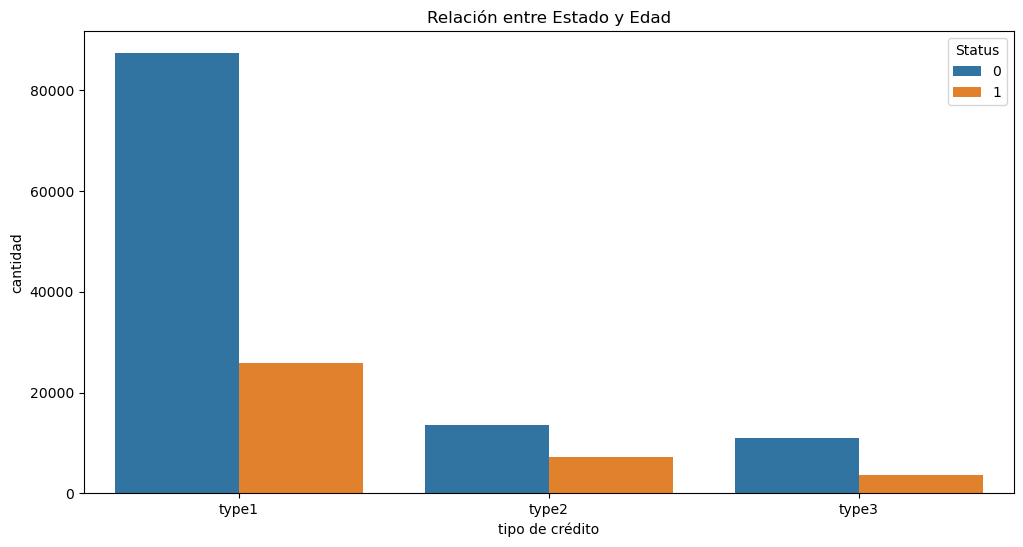

In [23]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x="loan_type", hue="Status", data=loan)

plt.xlabel("tipo de crédito")
plt.ylabel("cantidad")
plt.title("Relación entre Estado y Edad")

plt.show()

In [7]:
echo "# datascience" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/diegoaxe96/datascience.git
git push -u origin main


SyntaxError: invalid syntax (2942714356.py, line 1)